# Explore and Plot the ATL06 data

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (12, 7), 'font.size': 10})

import hvplot
import hvplot.pandas
import geoviews as gv

In [2]:
%matplotlib inline

In [24]:
# outline = gpd.read_file(f'{icesat2_path}/strip_outline.shp')
# gseries.to_file('D:/wspace/icesat2/ian/ak_test.shp')
# outline = gpd.read_file('D:/wspace/icesat2/ian/ak_test.shp')
# outline = gpd.read_file('D:/wspace/icesat2/alaska3/outline.shp')

# outline = gpd.read_file('D:/wspace/icesat2/urmia/outline.shp')
# outline = gpd.read_file('D:/wspace/icesat2/tanana/outline.shp')
# icesat2_path = 'D:/wspace/icesat2/alaska3a'
# icesat2_path = f'/fs/project/howat.4/icesat2/greenland_ATL06'
# icesat2_path = f'/fs/project/howat.4/icesat2/rock_outcrop'
# icesat2_path = 'D:/icesat2/test_peru_ATL03'
# icesat2_path = 'D:/icesat2/cordillera2_ATL06'
# icesat2_path = f'/fs/project/howat.4/icesat2/barenesa'
# icesat2_path = f'/fs/project/howat.4/icesat2/rock_outcrop_ATL06'
# icesat2_path = f'/fs/project/howat.4/icesat2/mcmurdo_ATL06'
icesat2_path = f'test_data/test1'


files = os.listdir(f'{icesat2_path}')
# outline = gpd.read_file(f'{icesat2_path}/outline.shp')
# outline = outline.to_crs({'init': 'epsg:4326'})
# outline.plot()

In [37]:
shp_ext = 'shp' #'.gpkg'
hdf_files = [f for f in files if f.endswith('.h5')]
shp_files = [f for f in files if f.endswith(f'.{shp_ext}') and 'ATL06' in f]
csv_files = [f for f in files if f.endswith('.csv') and 'ATL06' in f]
# To pick the largest granule for visualization only
sz_list = [os.path.getsize(f'{icesat2_path}/{hdf}') for hdf in hdf_files]
idx = sz_list.index(max(sz_list)) #largest index
print('No of shp files',len(shp_files), len(hdf_files))

No of shp files 21 21


In [38]:
idx

1

In [39]:
# [sz/1e6 for sz in sz_list]
shp_files

['processed_ATL06_20190728160425_04670405_003_01.shp',
 'processed_ATL06_20190730022814_04890403_003_01.shp',
 'processed_ATL06_20190803021956_05500403_003_01.shp',
 'processed_ATL06_20190814150529_07260405_003_01.shp',
 'processed_ATL06_20190818145711_07870405_003_01.shp',
 'processed_ATL06_20190912134134_11680405_003_01.shp',
 'processed_ATL06_20190916133315_12290405_003_01.shp',
 'processed_ATL06_20190824011241_08700403_003_01.shp',
 'processed_ATL06_20190828010421_09310403_003_01.shp',
 'processed_ATL06_20190822144852_08480405_003_01.shp',
 'processed_ATL06_20190826144033_09090405_003_01.shp',
 'processed_ATL06_20190929233206_00470503_003_01.shp',
 'processed_ATL06_20190920132457_12900405_003_01.shp',
 'processed_ATL06_20190924131638_13510405_003_01.shp',
 'processed_ATL06_20191003232348_01080503_003_01.shp',
 'processed_ATL06_20191020222450_03670503_003_01.shp',
 'processed_ATL06_20191024221631_04280503_003_01.shp',
 'processed_ATL06_20191023115243_04060505_003_01.shp',
 'processe

In [42]:
# idx = 4 #aside: choose here manually
fname = shp_files[idx].split(f'.{shp_ext}')[0]
fname

'processed_ATL06_20190730022814_04890403_003_01'

In [43]:
# Load ATL08 parsed data
df = pd.read_csv(f'{icesat2_path}/{fname}.csv', parse_dates=True)
gdf = gpd.read_file(f'{icesat2_path}/{fname}.{shp_ext}', parse_dates=True)
# Pick only the good quality data [verify if zero or one means good]
# df = df[df.q_flag==0]
# gdf = gdf[gdf.q_flag==0]

gtls = list(df.strip.unique())
print(len(df), gtls)
# gv.tile_sources.ESRI * gdf.hvplot.points(geo=True, color='strip', alpha=0.7, width=500, height=700, hover=['strip', 'h_te_media'])

14459 ['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']


In [45]:
# Read parse csv and shapefiles
df = pd.read_csv(f'{icesat2_path}/{fname}.csv', parse_dates=True)
gdf = gpd.read_file(f'{icesat2_path}/{fname}.{shp_ext}', parse_dates=True)

# # Pick only the good quality data
# df = df[df.q_flag==0]
# gdf = gdf[gdf.q_flag==0]


In [46]:
# import contextily as ctx

In [47]:
base = gv.tile_sources.ESRI

In [48]:
df.head()

lon        lat       h_li  q_flag                     t_dt strip
0 -21.715610  78.713096  311.89868       0  2019-07-30 02:33:55.854  gt1l
1 -21.715785  78.713272  312.85284       0  2019-07-30 02:33:55.857  gt1l
2 -21.715960  78.713447  313.63843       0  2019-07-30 02:33:55.860  gt1l
3 -21.716136  78.713623  314.49810       0  2019-07-30 02:33:55.862  gt1l
4 -21.716313  78.713799  315.33590       0  2019-07-30 02:33:55.865  gt1l

In [49]:
gdf.head()

t_dt        h_li  q_flag strip  \
0  2019-07-30 02:33:55.854000  311.898682       0  gt1l   
1  2019-07-30 02:33:55.857000  312.852844       0  gt1l   
2  2019-07-30 02:33:55.860000  313.638428       0  gt1l   
3  2019-07-30 02:33:55.862000  314.498108       0  gt1l   
4  2019-07-30 02:33:55.865000  315.335907       0  gt1l   

                     geometry  
0  POINT (-21.71561 78.71310)  
1  POINT (-21.71579 78.71327)  
2  POINT (-21.71596 78.71345)  
3  POINT (-21.71614 78.71362)  
4  POINT (-21.71631 78.71380)

In [50]:
strips = gdf.hvplot.points(geo=True, color='strip', alpha=0.7, width=400, height=500)
terrain_scatter = df.hvplot(y='lat', x='h_li', kind='scatter', width=300, height=500, alpha=.7).relabel('terrain') 
fig1 = base*strips + terrain_scatter

In [51]:
# hvplot.save(fig1, f'{icesat2_path}/{fname}.png')
fig1

:Layout
   .Overlay.I       :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [Longitude,Latitude]   (strip)
   .Scatter.Terrain :Scatter   [h_li]   (lat)

In [52]:
df.t_dt

0        2019-07-30 02:33:55.854
1        2019-07-30 02:33:55.857
2        2019-07-30 02:33:55.860
3        2019-07-30 02:33:55.862
4        2019-07-30 02:33:55.865
                  ...           
14454    2019-07-30 02:34:02.737
14455    2019-07-30 02:34:02.740
14456    2019-07-30 02:34:02.743
14457    2019-07-30 02:34:02.745
14458    2019-07-30 02:34:02.748
Name: t_dt, Length: 14459, dtype: object

In [53]:
df['t_dt'] = pd.to_datetime(df.t_dt)
df.t_dt

0       2019-07-30 02:33:55.854
1       2019-07-30 02:33:55.857
2       2019-07-30 02:33:55.860
3       2019-07-30 02:33:55.862
4       2019-07-30 02:33:55.865
                  ...          
14454   2019-07-30 02:34:02.737
14455   2019-07-30 02:34:02.740
14456   2019-07-30 02:34:02.743
14457   2019-07-30 02:34:02.745
14458   2019-07-30 02:34:02.748
Name: t_dt, Length: 14459, dtype: datetime64[ns]

In [54]:
df.head()

lon        lat       h_li  q_flag                    t_dt strip
0 -21.715610  78.713096  311.89868       0 2019-07-30 02:33:55.854  gt1l
1 -21.715785  78.713272  312.85284       0 2019-07-30 02:33:55.857  gt1l
2 -21.715960  78.713447  313.63843       0 2019-07-30 02:33:55.860  gt1l
3 -21.716136  78.713623  314.49810       0 2019-07-30 02:33:55.862  gt1l
4 -21.716313  78.713799  315.33590       0 2019-07-30 02:33:55.865  gt1l

In [55]:
df.hvplot(y='h_li', x='t_dt', by='strip', kind='scatter')

:NdOverlay   [strip]
   :Scatter   [t_dt]   (h_li)

In [56]:
len(hdf_files)

21

In [21]:
import panel as pn
import xarray as xr
import hvplot.xarray
import cartopy.crs as ccrs

In [22]:
rasm = xr.tutorial.open_dataset('rasm').load()
method = rasm.mean(dim='time').hvplot.quadmesh
opts = dict(x='xc', y='yc', cmap='rainbow', coastline=True, geo=True)

/home/yadav.111/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [23]:
pn.interact(lambda **kwargs: method(**kwargs, **opts), rasterize=True, project=True, projection=[ccrs.GOOGLE_MERCATOR, ccrs.Orthographic(90, 30)])

Column
    [0] Column
        [0] Checkbox(name='rasterize', value=True)
        [1] Checkbox(name='project', value=True)
        [2] Select(name='projection', options=[<cartopy.crs.Mercator obj...], value=<cartopy.crs.Mercator o...)
    [1] Row
        [0] HoloViews(DynamicMap, name='interactive04301')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

/home/yadav.111/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/yadav.111/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/yadav.111/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/yadav.111/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('T

/home/yadav.111/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/yadav.111/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/yadav.111/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/yadav.111/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('T

:DynamicMap   [time]
   :Overlay
      .Image.I     :Image   [lon,lat]   (air)
      .Coastline.I :Feature   [Longitude,Latitude]
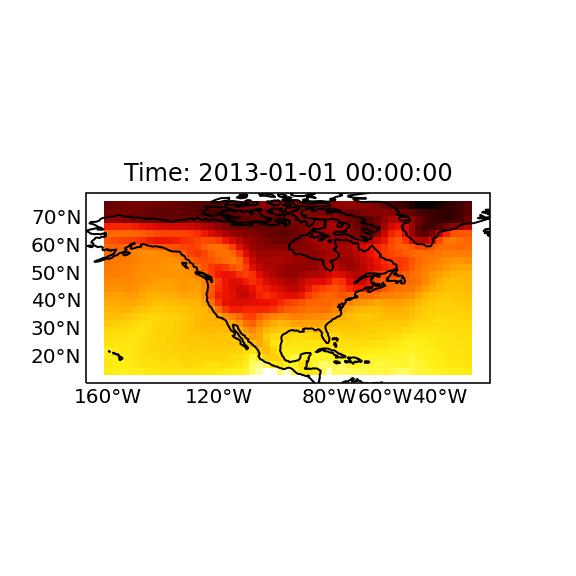

In [24]:
import xarray as xr
import geoviews as gv
gv.extension('matplotlib')
ds = xr.tutorial.open_dataset('air_temperature')
gv.Dataset(ds).to.image(['lon', 'lat'], ['air'], dynamic=True) * gv.feature.coastline()